# Sentiment Analysis with TextBlob

* python script for sentiment analysis with textblob classifier

## Install and import required libraries and packages

In [1]:
from google.colab import drive
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Textblob classifier on labeled test dataset

### Read dataset

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# test data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp project/Sentiment Analysis/final datasets/biden_tweets_labeled_test.csv')

df

,Unnamed: 0,raw_text,clean_text,subjectivity,polarity
0,0,Sidney Powell amends court filing that said Ge...,sidney powell amends court filing said georgia...,1,1
1,1,@LisaMirandoCNN @wolfblitzer What's your thoug...,lisamirandocnn wolfblitzer thought cnn jake ta...,0,2
2,2,Breaking #FoxNews Alert : Joe Biden just revea...,breaking foxnews alert joe biden revealed goin...,0,2
3,3,"@RWPUSA Richard, have you heard there could be...",rwpusa richard heard could several republican ...,1,0
4,4,@LeafCavalier @AFJustinKG1 Is that a real-life...,leafcavalier afjustinkg real life question not...,1,0
...,...,...,...,...,...
349,349,@realDonaldTrump Thank you Biden!!!,realdonaldtrump thank biden,1,1
350,350,Kellyanne Conway acknowledges Biden as apparen...,kellyanne conway acknowledges biden apparent w...,0,2
351,351,@JeffTutorials @realDonaldTrump Ah Jeff. I ag...,jefftutorials realdonaldtrump ah jeff agree bi...,1,0
352,352,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...,0,2


In [4]:
df.columns

Index(['Unnamed: 0', 'raw_text', 'clean_text', 'subjectivity', 'polarity'], dtype='object')

In [5]:
df = df.drop('Unnamed: 0', axis=1)

df

,raw_text,clean_text,subjectivity,polarity
0,Sidney Powell amends court filing that said Ge...,sidney powell amends court filing said georgia...,1,1
1,@LisaMirandoCNN @wolfblitzer What's your thoug...,lisamirandocnn wolfblitzer thought cnn jake ta...,0,2
2,Breaking #FoxNews Alert : Joe Biden just revea...,breaking foxnews alert joe biden revealed goin...,0,2
3,"@RWPUSA Richard, have you heard there could be...",rwpusa richard heard could several republican ...,1,0
4,@LeafCavalier @AFJustinKG1 Is that a real-life...,leafcavalier afjustinkg real life question not...,1,0
...,...,...,...,...
349,@realDonaldTrump Thank you Biden!!!,realdonaldtrump thank biden,1,1
350,Kellyanne Conway acknowledges Biden as apparen...,kellyanne conway acknowledges biden apparent w...,0,2
351,@JeffTutorials @realDonaldTrump Ah Jeff. I ag...,jefftutorials realdonaldtrump ah jeff agree bi...,1,0
352,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...,0,2


### Textblob sentiment analysis

* positive sentiment: polarity score > 0
* neutral sentiment: polarity score = 0
* negative sentiment: polarity score < 0

In [6]:
def textblob_analysis(sentence):
  score = TextBlob(sentence).sentiment.polarity

  if score < 0:
      result = 0
  elif score == 0:
    result = 2
  else:
    result = 1

  return result

In [7]:
# add textblob scores to dataframe
df['textblob_score'] = df['clean_text'].apply(textblob_analysis)

df

,raw_text,clean_text,subjectivity,polarity,textblob_score
0,Sidney Powell amends court filing that said Ge...,sidney powell amends court filing said georgia...,1,1,2
1,@LisaMirandoCNN @wolfblitzer What's your thoug...,lisamirandocnn wolfblitzer thought cnn jake ta...,0,2,1
2,Breaking #FoxNews Alert : Joe Biden just revea...,breaking foxnews alert joe biden revealed goin...,0,2,2
3,"@RWPUSA Richard, have you heard there could be...",rwpusa richard heard could several republican ...,1,0,2
4,@LeafCavalier @AFJustinKG1 Is that a real-life...,leafcavalier afjustinkg real life question not...,1,0,1
...,...,...,...,...,...
349,@realDonaldTrump Thank you Biden!!!,realdonaldtrump thank biden,1,1,2
350,Kellyanne Conway acknowledges Biden as apparen...,kellyanne conway acknowledges biden apparent w...,0,2,1
351,@JeffTutorials @realDonaldTrump Ah Jeff. I ag...,jefftutorials realdonaldtrump ah jeff agree bi...,1,0,0
352,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...,0,2,1


### Export results

In [8]:
# labeled test data
textblob_label_file_name = 'textblob_results_test_labeled.csv'
  
df.to_csv(textblob_label_file_name)

### Evaluate model

In [9]:
textblob_predict = df['textblob_score'].values

In [10]:
textblob_predict

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1,
       0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1, 2, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 2, 0, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1,
       1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 2, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1,
       0, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1,
       2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2,

In [11]:
true_predict = df['polarity'].values

In [12]:
true_predict

array([1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 2, 1,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1,
       0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1,
       2, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1,

In [13]:
acc_score = accuracy_score(true_predict, textblob_predict)

print("textblob accuracy: ", str(acc_score))

textblob accuracy:  0.3898305084745763


In [14]:
print(classification_report(true_predict, textblob_predict))

              precision    recall  f1-score   support

           0       0.63      0.30      0.41       167
           1       0.36      0.54      0.43        96
           2       0.28      0.40      0.33        91

    accuracy                           0.39       354
   macro avg       0.42      0.41      0.39       354
weighted avg       0.47      0.39      0.39       354



## Apply on full dataset

### Read dataset

In [15]:
# full data
df_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp project/Sentiment Analysis/final datasets/biden_tweets_processed.csv')

df_full

,Unnamed: 0,raw_text,clean_text
0,0,@NCatalyst19 @RattlerGator This fake virus is ...,ncatalyst rattlergator fake virus deep state g...
1,1,@propublica I now think Biden should keep Trum...,propublica think biden keep trump anti deep st...
2,2,@Acosta Hopefully it's a foregone conclusion t...,acosta hopefully foregone conclusion president...
3,3,@realDonaldTrump @POTUS I don't trust the @FBI...,realdonaldtrump potus trust fbi wray even look...
4,4,President-elect Joe Biden is predicting a “ble...,president elect joe biden predicting bleak fut...
...,...,...,...
17626,17626,"@MSNBC I mean shit, what if Biden turns out to...",msnbc mean shit biden turn disaster people flo...
17627,17627,Pentagon blocks visits to military spy agencie...,pentagon block visit military spy agency biden...
17628,17628,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...
17629,17629,@Tomboliko @the_resistor @realDonaldTrump Hill...,tomboliko resistor realdonaldtrump hillary che...


In [16]:
df_full.columns

Index(['Unnamed: 0', 'raw_text', 'clean_text'], dtype='object')

In [17]:
df_full = df_full.drop('Unnamed: 0', axis=1)

df_full

,raw_text,clean_text
0,@NCatalyst19 @RattlerGator This fake virus is ...,ncatalyst rattlergator fake virus deep state g...
1,@propublica I now think Biden should keep Trum...,propublica think biden keep trump anti deep st...
2,@Acosta Hopefully it's a foregone conclusion t...,acosta hopefully foregone conclusion president...
3,@realDonaldTrump @POTUS I don't trust the @FBI...,realdonaldtrump potus trust fbi wray even look...
4,President-elect Joe Biden is predicting a “ble...,president elect joe biden predicting bleak fut...
...,...,...
17626,"@MSNBC I mean shit, what if Biden turns out to...",msnbc mean shit biden turn disaster people flo...
17627,Pentagon blocks visits to military spy agencie...,pentagon block visit military spy agency biden...
17628,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...
17629,@Tomboliko @the_resistor @realDonaldTrump Hill...,tomboliko resistor realdonaldtrump hillary che...


### Textblob sentiment analysis

In [18]:
# add textblob scores to dataframe
df_full['textblob_score'] = df_full['clean_text'].apply(textblob_analysis)

df_full

,raw_text,clean_text,textblob_score
0,@NCatalyst19 @RattlerGator This fake virus is ...,ncatalyst rattlergator fake virus deep state g...,0
1,@propublica I now think Biden should keep Trum...,propublica think biden keep trump anti deep st...,0
2,@Acosta Hopefully it's a foregone conclusion t...,acosta hopefully foregone conclusion president...,2
3,@realDonaldTrump @POTUS I don't trust the @FBI...,realdonaldtrump potus trust fbi wray even look...,0
4,President-elect Joe Biden is predicting a “ble...,president elect joe biden predicting bleak fut...,1
...,...,...,...
17626,"@MSNBC I mean shit, what if Biden turns out to...",msnbc mean shit biden turn disaster people flo...,0
17627,Pentagon blocks visits to military spy agencie...,pentagon block visit military spy agency biden...,0
17628,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...,1
17629,@Tomboliko @the_resistor @realDonaldTrump Hill...,tomboliko resistor realdonaldtrump hillary che...,0


### Results summary

In [19]:
total_counts = len(df_full.index)

total_counts

17631

In [20]:
df_full['textblob_score'].unique()

array([0, 2, 1])

In [21]:
textblob_counts = df_full['textblob_score'].value_counts()

textblob_counts

1    7888
2    6028
0    3715
Name: textblob_score, dtype: int64

In [22]:
neg_counts = df_full['textblob_score'].value_counts()[0]

neg_counts

3715

In [23]:
pos_counts = df_full['textblob_score'].value_counts()[1]

pos_counts

7888

In [24]:
neu_counts = df_full['textblob_score'].value_counts()[2]

neu_counts

6028

In [25]:
print("Total number of tweets: " + str(total_counts))
print('\n')
print("Number of negative tweets: " + str(neg_counts))
print("Number of positive tweets: " + str(pos_counts))
print("Number of neutral tweets: " + str(neu_counts))

Total number of tweets: 17631


Number of negative tweets: 3715
Number of positive tweets: 7888
Number of neutral tweets: 6028


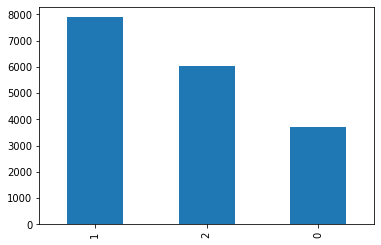

In [26]:
df_full['textblob_score'].value_counts().plot.bar()

### Export results

In [27]:
# full data
textblob_file_name = 'textblob_results_full.csv'
  
df_full.to_csv(textblob_file_name)